In [22]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
df = pd.read_csv("C:/Users/joali/Downloads/steam.csv/steam.csv")

In [24]:
df.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


Preprocessing

In [25]:
df.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

C:\Users\joali\AppData\Local\Temp\ipykernel_30864\534474264.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


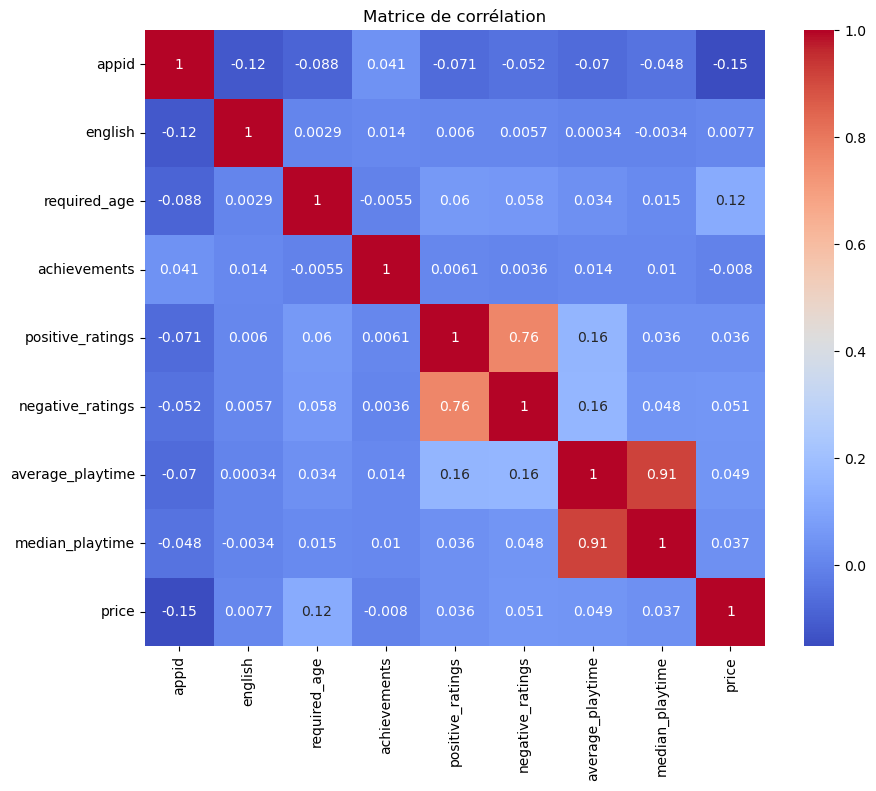

In [26]:
correlation_matrix = df.corr()

# Tracer la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

In [33]:
df["positive_ratio"] = df["positive_ratings"] / (df["positive_ratings"] + df["negative_ratings"])

In [34]:
df = df[(df['positive_ratings'] + df['negative_ratings']) >= 500]

Encoding

In [48]:
df_encoded = pd.get_dummies(df)
df_encoded.head(5)

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,positive_ratio,...,owners_10000000-20000000,owners_100000000-200000000,owners_20000-50000,owners_200000-500000,owners_2000000-5000000,owners_20000000-50000000,owners_50000-100000,owners_500000-1000000,owners_5000000-10000000,owners_50000000-100000000
0,10,1,0,0,124534,3339,17612,317,7.19,0.973888,...,1,0,0,0,0,0,0,0,0,0
1,20,1,0,0,3318,633,277,62,3.99,0.839787,...,0,0,0,0,0,0,0,0,1,0
2,30,1,0,0,3416,398,187,34,3.99,0.895648,...,0,0,0,0,0,0,0,0,1,0
3,40,1,0,0,1273,267,258,184,3.99,0.826623,...,0,0,0,0,0,0,0,0,1,0
4,50,1,0,0,5250,288,624,415,3.99,0.947996,...,0,0,0,0,0,0,0,0,1,0


In [49]:
X = df.drop(columns=["positive_ratio"], axis=1)
y = df["positive_ratio"]

In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X = X.apply(label_encoder.fit_transform)
X

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,0,648,3,1,2404,1744,3,0,113,0,71,0,2507,1264,1213,313,3,42
1,1,3073,1,1,2404,1744,3,0,113,0,71,0,1567,579,277,62,11,21
2,2,760,7,1,2404,1744,3,0,211,0,904,0,1581,387,187,34,11,21
3,3,804,5,1,2404,1744,3,0,113,0,71,0,846,259,258,180,11,21
4,4,1403,2,1,915,1744,3,0,974,0,876,0,1843,280,569,408,11,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26681,3819,3809,1807,1,2610,1901,0,0,1201,418,1312,27,347,11,154,152,0,54
26856,3820,1822,1814,1,557,408,2,0,1309,353,1705,15,376,21,12,12,9,0
26875,3821,3596,1813,1,1174,869,2,0,327,55,731,0,45,257,0,0,9,0
26899,3822,1562,1816,1,957,721,0,0,1217,363,2320,26,971,69,0,0,1,28


In [51]:
y = y.astype(float)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
from sklearn.tree import DecisionTreeClassifier

# Création du modèle d'arbre de décision pour la classification des prix
model_price_tree = DecisionTreeClassifier(random_state=42)

# Entraînement du modèle
model_price_tree.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model_price_tree.predict(X_test)

# Évaluation du modèle
mse_tree = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Decision Tree for Price):", mse_tree)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_playtime_tree = DecisionTreeClassifier(random_state=42)

model_playtime_tree.fit(X_train, y_train)

y_pred_tree = model_playtime_tree.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Mean Squared Error (Decision Tree):", mse_tree)
print("R-squared (Decision Tree):", r2_tree)
